### <p style="text-align: right;"> &#9989; Jalin Lewis</p>


# Modeling Disease with ODEs

<img src="https://slopefield.files.wordpress.com/2016/03/runge-kutta.png?w=663" width= 400><p style="text-align: right;">
</p>

## Learning Goals

- Finalize the algorithm for Euler's method
- Implement a higher order method
- Compare the solutions of each algorithm

## Criteria for Uniqueness 
In order to make my model unique, and from the existing model, here are the **two criteria** I Used: 

**I Chose a specific disease to model.**
There are a number of diseases and viruses that are out there, some more interesting than others. The disease that I will choose impacts the rate at which a person becomes infected, how long they are infected for, and how easily they spread the disease to others in the population. For this I chose chicken pox.

**Add a compartment.**
My model needs to contain a minimum of three compartments and a maximum of five. At least one of the compartments needs to be different from the existing S, I, and R. Here I chose to add in a vaccination model part, that way I could add my own spin to the model itself and see if I could accurately depict it.

---
# Euler's Method

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Euler_method.svg/220px-Euler_method.svg.png" width= 200><p style="text-align: right;"> 


Using Euler method, I needed to find the amount of susceptible, infected and recovered specimens within a specific virus standard, however, with a added class of those vaccinated and how it would effect the popoulation as a whole. Using the Euler Method 

$$
y_{n+1} = y_n + dt*f(t_n, y_n)
$$

I was able to model what the standard would like for this infectious disease

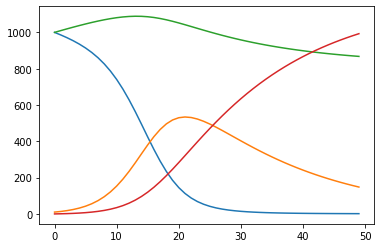

In [7]:
# paste your work from the previous class here
import numpy as np
import matplotlib.pyplot as plt



def chickenpox(susceptible,infected,vaccinated,recovered):
    
    alpha = .0004
    beta = .05 * alpha
    gamma = .01
    mu = 1/14


    ds_dt = -(alpha * susceptible * infected) - (gamma * susceptible)
    dI_dt = (alpha * susceptible *infected) + (beta * vaccinated *infected) - (mu * infected)
    dv_dt = (gamma * susceptible) - (beta * vaccinated* infected)
    dR_dt = mu * infected
    
    susceptible = susceptible + ds_dt
    infected = infected + dI_dt
    vaccinated = vaccinated + dv_dt
    recovered = recovered + dR_dt
    
    return susceptible,infected,vaccinated,recovered

susceptible = 1000
infected = 10
vaccinated = 1000
recovered = 0

    
        
        
s_list = []
i_list = []
v_list = []
r_list = []
t_list = []

for i in range(50):
    s_list.append(susceptible)
    i_list.append(infected)
    v_list.append(vaccinated)
    r_list.append(recovered)
    t_list.append(i)
    
    susceptible,infected,vaccinated,recovered = chickenpox(susceptible,infected,vaccinated,recovered)
    
plt.plot(t_list,s_list)
plt.plot(t_list,i_list)
plt.plot(t_list,v_list)
plt.plot(t_list,r_list)
plt.show()

# Midpoint Method

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Midpoint_method_illustration.png/220px-Midpoint_method_illustration.png" width= 200>


In terms of difficulty, the [midpoint method](https://en.wikipedia.org/wiki/Midpoint_method) is the next level above Euler's method. If you recall, Euler's method is defined as

$$
y_{n+1} = y_n + dt*f(t_n, y_n)
$$

where the function $f$ is your ODE. The midpoint method is different in that it uses Euler's method to solve for a point that is halfway between $t_n$ and $t_{n+1}$ since the slope generated by that halfway point will yield a better approximation for the shape of the unknown curve. Once you have the slope, and location, of the halfway point you can use Euler's method *again* to get all the way to $y_{n+1}$. So, the midpoint method is defined as

$$
y_{n+1} = y_n + dt*f\Big(t_n + \frac{dt}{2}, y_n + \frac{dt}{2}f(t_n, y_n)\Big)
$$

where $f$ is your ODE. 

The value of using the midpoint method is that you are able to get to a more accurate solution without having to make your time step, dt, smaller. It can be implemented into code in the same fashion as Euler's method too! 

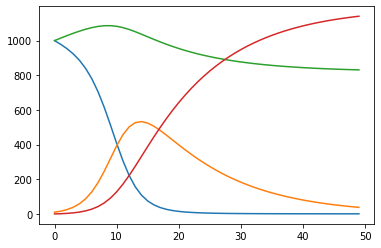

In [8]:
# Put your code here that implements a solution for your ODEs using the Midpoint Method
import numpy as np
import matplotlib.pyplot as plt



def chickenpox(susceptible,infected,vaccinated,recovered):
    
    alpha = .0004
    beta = .05 * alpha
    gamma = .01
    mu = 1/14


    ds_dt = -(alpha * susceptible * infected) - (gamma * susceptible)
    dI_dt = (alpha * susceptible *infected) + (beta * vaccinated *infected) - (mu * infected)
    dv_dt = (gamma * susceptible) - (beta * vaccinated* infected)
    dR_dt = mu * infected
    
    susceptible1 = susceptible + (ds_dt/2)
    infected1 = infected + (dI_dt/2)
    vaccinated1 = vaccinated + (dv_dt/2)
    recovered1 = recovered + (dR_dt/2)
    
    ds_dt2 = -(alpha * susceptible1 * infected1) - (gamma * susceptible1)
    dI_dt2 = (alpha * susceptible1 *infected1) + (beta * vaccinated1 *infected1) - (mu * infected1)
    dv_dt2 = (gamma * susceptible1) - (beta * vaccinated1* infected1)
    dR_dt2 = mu * infected1
    
    susceptible2 = susceptible1 + (ds_dt2)
    infected2 = infected1 + (dI_dt2)
    vaccinated2 = vaccinated1 + (dv_dt2)
    recovered2 = recovered1 + (dR_dt2)
    
    return susceptible2,infected2,vaccinated2,recovered2

susceptible2 = 1000
infected2 = 10
vaccinated2 = 1000
recovered2 = 0

    
        
        
s_list1 = []
i_list1 = []
v_list1 = []
r_list1 = []
t_list1 = []


for i in range(50):
    s_list1.append(susceptible2)
    i_list1.append(infected2)
    v_list1.append(vaccinated2)
    r_list1.append(recovered2)
    t_list1.append(i)
    
    susceptible2,infected2,vaccinated2,recovered2 = chickenpox(susceptible2,infected2,vaccinated2,recovered2)
    

plt.plot(t_list1,s_list1)
plt.plot(t_list1,i_list1)
plt.plot(t_list1,v_list1)
plt.plot(t_list1,r_list1)

# Comparing the Methods

Now that I have constructed more than one algorithm for solving your set of ODEs, it's time to see how the results they yield differ. In the space provided below, I created a graph that compares each set of solutions. 

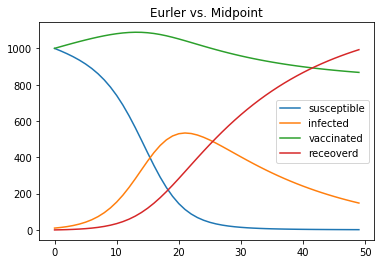

In [5]:
# Put your comparison code here
plt.title("Eurler vs. Midpoint")
plt.plot(t_list, s_list, label = "susceptible")
plt.plot(t_list, i_list, label = "infected")
plt.plot(t_list, v_list, label = "vaccinated")
plt.plot(t_list, r_list, label = "receoverd")
plt.legend()